In [2]:
!apt-get update
!apt-get install g++ openjdk-8-jdk python-dev python3-dev
!pip3 install JPype1-py3
!pip3 install konlpy

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:7 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [979 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,236 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [832 kB]
Hit:13 https://ppa.launchpadcontent.net/ub

In [3]:
# 네이버 리뷰 문장 데이터셋을 불러옵니다.
!wget https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt -O ratings.txt

--2023-08-16 08:47:16--  https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19515078 (19M) [text/plain]
Saving to: ‘ratings.txt’

ratings.txt         100%[===================>]  18.61M  --.-KB/s    in 0.05s   

2023-08-16 08:47:18 (353 MB/s) - ‘ratings.txt’ saved [19515078/19515078]



In [4]:
#필요한 라이브러리 불러오기
import pandas as pd

#학습용 데이터 초기화
train_data = pd.read_table('ratings.txt')

In [5]:
train_data

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ;;,0
199996,3302770,쓰.레.기,0
199997,5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0


In [6]:
# 한글 형태소 분석기를 이용해 토큰화 작업을 수행합니다.
from konlpy.tag import Okt

tokenized_dataset = [] # 토큰화 완료된 학습 데이터
stopwords = ['은', '는', '이', '가', '을', '를'] # 불용어 정의
okt = Okt() # 한글 형태소 분석기 라이브러리 객체 선언

for w in train_data['document']:
    if isinstance(w, str): # w가 문자열인지 확인
        tokenized = okt.morphs(w, stem=True)
        tokenized = [word for word in tokenized if not word in stopwords]
        tokenized_dataset.append(tokenized)
    else:
        # 문자열이 아닌 경우에 대한 처리
        # 예) tokenized_dataset.append([])로 비어있는 리스트 추가
        # 또는 pass로 아무런 처리도 하지 않을 수 있습니다.
        pass


코드 설명


tokenized = okt.morphs(w, stem=True)

형태소 분석기 okt를 사용하여 w를 형태소 단위로 분리하고, 동사나 형용사의 경우 기본 형태로 변환(예: "먹었다" -> "먹다")하는 작업 수행.


결과는 tokenized 변수에 리스트 형태로 저장.

In [7]:
# 토큰화 완료된 데이터의 개수 확인
print(len(tokenized_dataset))

199992


In [8]:
# 토큰화가 완료된 리뷰 데이터 확인
print(tokenized_dataset[0])
print(tokenized_dataset[1])
print(tokenized_dataset[2])

['어리다', '때', '보고', '지금', '다시', '보다', '재밌다', 'ㅋㅋ']
['디자인', '배우다', '학생', '으로', ',', '외국', '디자이너', '와', '그', '들', '일군', '전통', '통해', '발전', '하다', '문화', '산업', '부럽다', '.', '사실', '우리나라', '에서도', '그', '어렵다', '시절', '에', '끝', '까지', '열정', '지키다', '노라노', '같다', '전통', '있다', '저', '와', '같다', '사람', '들', '꿈', '꾸다', '이루다', '나가다', '수', '있다', '것', '에', '감사하다', '.']
['폴리스스토리', '시리즈', '1', '부터', '뉴', '까지', '버리다', '하나', '도', '없다', '..', '최고', '.']


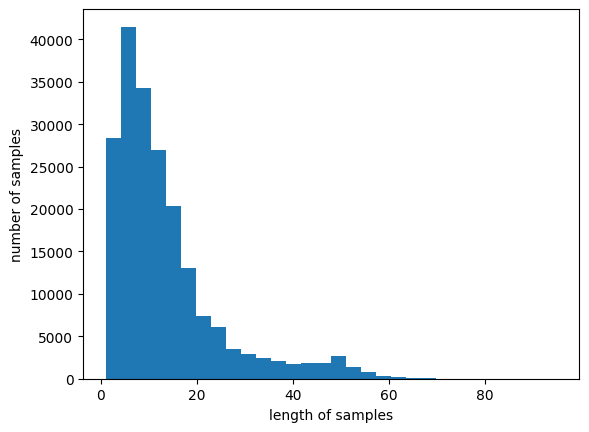

In [9]:
import matplotlib.pyplot as plt

# 리뷰에 포함된 토큰의 개수 분포
plt.hist([len(s) for s in tokenized_dataset], bins=30)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

### gensim :

- Numpy, Scipy 등으로 구현된 오픈소스 자연어처리 라이브러리로, Word2Vec 클래스를 지원
  - vector_size: 임베딩 벡터의 차원
  - window: 윈도우 크기
  - min_count: 단어 최소 빈도수
  - workers: 학습을 위해 사용하는 프로세스 수
  - sg: 0 = CBOW, 1 = Skip-gram

In [11]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=tokenized_dataset, vector_size=100, window=5, workers=4, sg=1)

In [13]:
#학습된 모델 출력
print(model)

Word2Vec<vocab=17627, vector_size=100, alpha=0.025>


In [14]:
print(model.wv.most_similar("공부"))

[('분발', 0.7074007987976074), ('반성', 0.7023686170578003), ('연습', 0.6913418173789978), ('자제', 0.6726592183113098), ('섭외', 0.6679863929748535), ('교체', 0.6606031060218811), ('찬성', 0.6578527688980103), ('만이라도', 0.6544906497001648), ('기부', 0.6535718441009521), ('수정', 0.6449779272079468)]


In [15]:
print(model.wv.most_similar("재미"))

[('긴장도', 0.7480877637863159), ('없슴', 0.6981361508369446), ('감흥', 0.6737370491027832), ('잼', 0.6688043475151062), ('스릴', 0.6675528287887573), ('쥐뿔', 0.6369656324386597), ('재미없다', 0.6354663372039795), ('뭣', 0.6322791576385498), ('흥미', 0.6249341368675232), ('산만', 0.6245101094245911)]


In [17]:
print(model.wv.most_similar("프로그램"))

[('프로', 0.7620106935501099), ('예능', 0.7411831021308899), ('미생', 0.6589545607566833), ('방송', 0.652390718460083), ('공중파', 0.6333842277526855), ('예체능', 0.6233038902282715), ('연속극', 0.6165472865104675), ('오디션', 0.6157121062278748), ('활동', 0.6128765344619751), ('시간대', 0.6048625111579895)]
